# Classification Algorithm :

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')

# work on insurance.csv file dataset

In [2]:
# to load dataset
df=pd.read_csv("insurance.csv")
df

,age,sex,bmi,children,smoker,region,charges,insuranceclaim
0,19,0,27.900,0,1,3,16884.92400,1
1,18,1,33.770,1,0,2,1725.55230,1
2,28,1,33.000,3,0,2,4449.46200,0
3,33,1,22.705,0,0,1,21984.47061,0
4,32,1,28.880,0,0,1,3866.85520,1
...,...,...,...,...,...,...,...,...
1333,50,1,30.970,3,0,1,10600.54830,0
1334,18,0,31.920,0,0,0,2205.98080,1
1335,18,0,36.850,0,0,2,1629.83350,1
1336,21,0,25.800,0,0,3,2007.94500,0


# Data Cleaning :

In [3]:
# here target means output variable : insuranceclaim (1/0)
df["insuranceclaim"].unique()        # how many categories in insuranceclaim column

array([1, 0])

In [4]:
# how many sample of 1's and 0's category
df["insuranceclaim"].value_counts()

insuranceclaim
1    783
0    555
Name: count, dtype: int64

In [5]:
# how many rows and columns in given dataset
df.shape

(1338, 8)

In [6]:
# to check null values in the given dataset
df.isnull().sum()

age               0
sex               0
bmi               0
children          0
smoker            0
region            0
charges           0
insuranceclaim    0
dtype: int64

In [7]:
# we can also cross check for null values 
df.dtypes

# here data types are correct so no null valuess

age                 int64
sex                 int64
bmi               float64
children            int64
smoker              int64
region              int64
charges           float64
insuranceclaim      int64
dtype: object

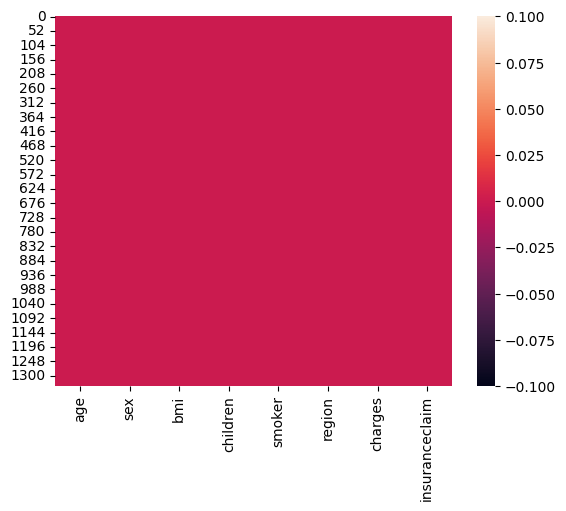

In [8]:
# visualization for null values
sns.heatmap(df.isnull())
plt.show()

# here the graph is pink so there is no null values 

In [9]:
# to check duplicate rows
df.duplicated().sum()

np.int64(1)

In [10]:
# to show duplicate rows
df[df.duplicated()]

,age,sex,bmi,children,smoker,region,charges,insuranceclaim
581,19,1,30.59,0,0,1,1639.5631,1


In [11]:
# to remove duplicates row permanantly : drop_duplicates()
df.drop_duplicates(inplace=True)

In [12]:
df.duplicated().sum()

# here duplicates values are removed from the given dataset

np.int64(0)

In [13]:
# to check the gender values of each gender      # here Male=1  &   Female=0    ( by alphabetically )
df['sex'].value_counts()

sex
1    675
0    662
Name: count, dtype: int64

# Data Visualization

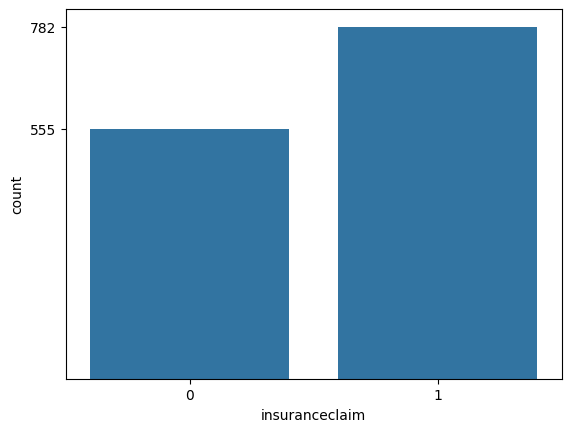

In [14]:
# visualization
sns.countplot(data=df,x="insuranceclaim")
f=df["insuranceclaim"].value_counts()
plt.yticks(f)
plt.show()

# Tip - for categorical values use countplot graph

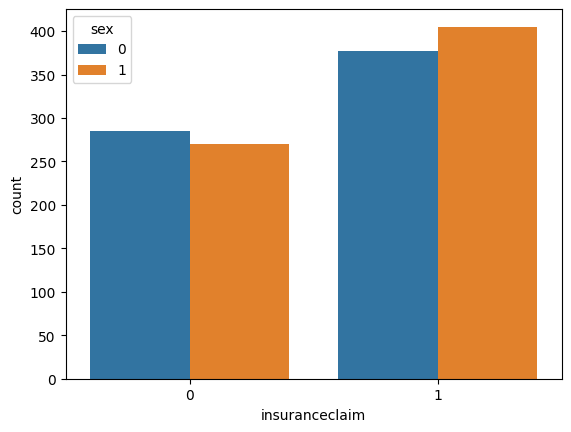

In [15]:
# to check the input sex is imp feature to predict the output insuranceclaim
sns.countplot(data=df,x='insuranceclaim',hue='sex')
# here X=output variable & hue=input variable (categorical type)
plt.show()

 female=0
 male=1

clearly shows in these graph , sex input is not imp to predict the iutput insuranceclaim

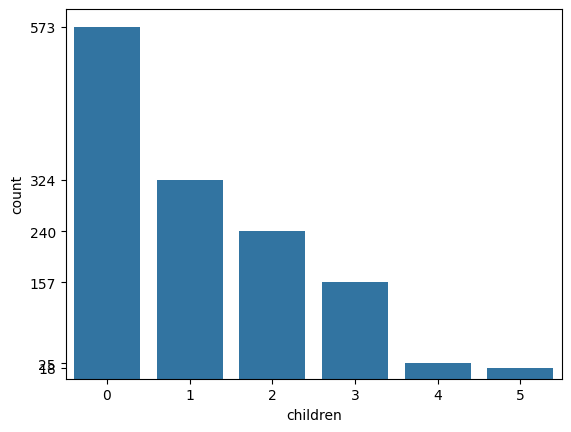

In [16]:
sns.countplot(data=df,x='children')
f=df['children'].value_counts()
plt.yticks(f)
plt.show()

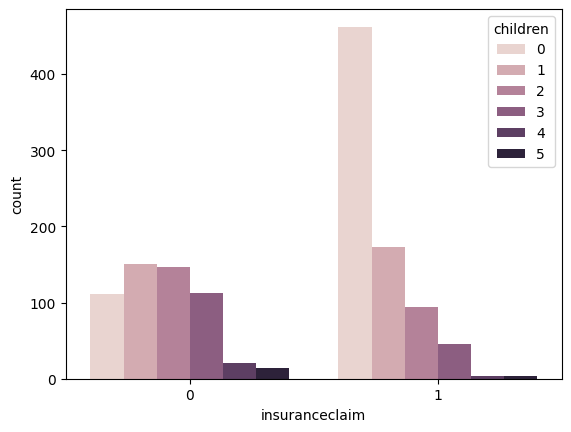

In [17]:
# to check the input "children" is imp feature to predict the output insuranceclaim
sns.countplot(data=df,x='insuranceclaim',hue='children')
plt.show()

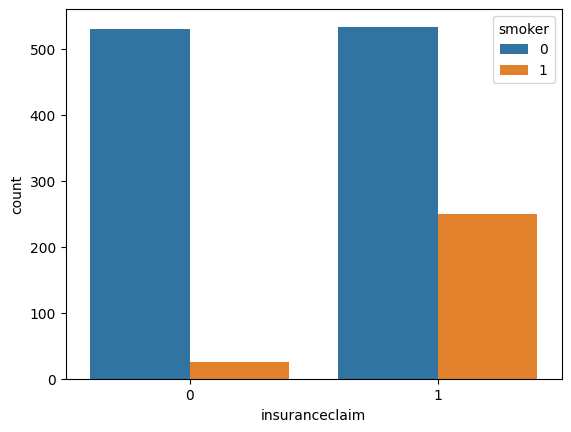

In [18]:
# to check the input "smoker" is imp feature to predict the output insuranceclaim
sns.countplot(data=df,x='insuranceclaim',hue='smoker')
plt.show()

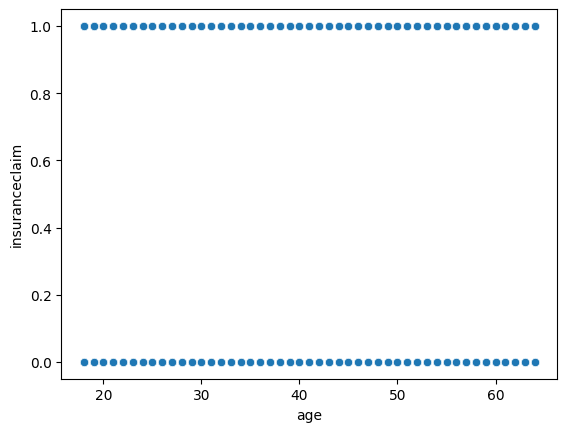

In [19]:
# to check the input "age" is imp feature to predict the output insuranceclaim
sns.scatterplot(data=df,x='age',y='insuranceclaim')
# here x=input variable & y=output variable
plt.show()

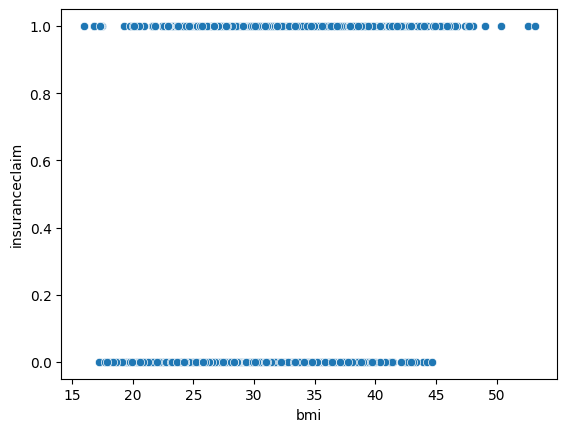

In [20]:
# to check the input "bmi" is imp feature to predict the output insuranceclaim
sns.scatterplot(data=df,x='bmi',y='insuranceclaim')
# here x=input variable & y=output variable
plt.show()

In [21]:
# select input & output from given dataset 
X=df.drop("insuranceclaim",axis=1)      # input
Y=df['insuranceclaim']   # output

In [22]:
X.head()

,age,sex,bmi,children,smoker,region,charges
0,19,0,27.900,0,1,3,16884.92400
1,18,1,33.770,1,0,2,1725.55230
2,28,1,33.000,3,0,2,4449.46200
3,33,1,22.705,0,0,1,21984.47061
4,32,1,28.880,0,0,1,3866.85520


In [23]:
Y.head()

0    1
1    1
2    0
3    0
4    1
Name: insuranceclaim, dtype: int64

# Train - Test Split

In [24]:
from sklearn.model_selection import train_test_split
X_train,X_test,Y_train,Y_test = train_test_split(X,Y,test_size=0.3,random_state=1)

In [25]:
X_train.shape, X_test.shape

((935, 7), (402, 7))

In [26]:
X_train.head()

,age,sex,bmi,children,smoker,region,charges
520,50,0,27.360,0,0,0,25656.57526
575,58,0,27.170,0,0,1,12222.89830
770,61,1,36.100,3,0,3,27941.28758
314,27,0,31.400,0,1,3,34838.87300
426,38,0,27.265,1,0,0,6555.07035


In [27]:
# Apply Scaling : StandardScaler
from sklearn.preprocessing import StandardScaler
# create object of StandardScaler
ss=StandardScaler()
X_train=ss.fit_transform(X_train)
X_test=ss.transform(X_test)

In [28]:
X_train

array([[ 0.76935907, -1.05611771, -0.54584829, ..., -0.53158148,
        -1.38997482,  0.97973397],
       [ 1.34169182, -1.05611771, -0.57768002, ..., -0.53158148,
        -0.48304777, -0.11634023],
       [ 1.5563166 ,  0.94686415,  0.91841121, ..., -0.53158148,
         1.33080632,  1.16614713],
       ...,
       [-1.23380557,  0.94686415,  0.5280537 , ..., -0.53158148,
         0.42387927, -0.97698935],
       [ 0.05394313, -1.05611771, -1.40698031, ...,  1.88117914,
         0.42387927,  0.47286216],
       [ 1.41323342,  0.94686415,  1.76278969, ...,  1.88117914,
         0.42387927,  2.88193206]])

In [29]:
X_test

array([[ 0.3401095 , -1.05611771,  1.39588714, ...,  1.88117914,
        -0.48304777,  2.3934608 ],
       [ 1.27015023,  0.94686415,  0.15444973, ..., -0.53158148,
        -0.48304777, -0.18729799],
       [ 1.12706704, -1.05611771,  0.29769251, ..., -0.53158148,
        -1.38997482, -0.14439093],
       ...,
       [ 0.98398385,  0.94686415, -1.54435935, ..., -0.53158148,
         1.33080632, -0.29237275],
       [-1.30534716, -1.05611771, -0.70668229, ..., -0.53158148,
         1.33080632, -0.9016684 ],
       [-1.01918078,  0.94686415, -0.73683866, ..., -0.53158148,
        -1.38997482, -0.89158843]])

# 1) Logistic Regression :

In [30]:
# Now create the Model with the help of logistic regression.
from sklearn.linear_model import LogisticRegression

In [31]:
# create the object of LogisticRegression class
lr=LogisticRegression()

In [32]:
# Train The Model with 70% data, use fit(): inbuilt  method of LogisticRegression class
lr.fit(X_train,Y_train)

LogisticRegression()

In [33]:
# Test the nodel with 30% data, use predict() function of sigmoid function (logit function)   Y_pred=1/(1+np.exp(-X))
# This equation gives the probability value
Y_pred=lr.predict(X_test)
Y_pred      # np.where (Y_pred>=0.5,1,0)

array([1, 1, 1, 1, 1, 0, 1, 0, 1, 1, 1, 0, 1, 0, 1, 1, 0, 1, 1, 0, 1, 1,
       1, 0, 0, 1, 0, 1, 0, 0, 1, 1, 0, 0, 1, 1, 1, 1, 1, 0, 0, 0, 0, 1,
       1, 1, 0, 0, 0, 1, 1, 0, 1, 1, 1, 0, 1, 1, 0, 1, 1, 1, 1, 0, 0, 0,
       1, 1, 1, 1, 1, 0, 1, 0, 1, 0, 0, 1, 1, 1, 1, 1, 0, 0, 1, 1, 1, 0,
       1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 0, 0, 1, 1, 0, 1, 1, 0, 0, 0, 0, 0,
       1, 0, 1, 1, 0, 0, 0, 1, 0, 1, 1, 0, 1, 0, 0, 1, 0, 1, 0, 1, 1, 0,
       0, 1, 1, 0, 0, 1, 0, 1, 1, 1, 1, 0, 0, 0, 0, 0, 1, 0, 1, 0, 1, 1,
       0, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0, 1, 1, 0, 1, 0, 0, 1, 1, 0, 0, 0,
       1, 0, 0, 1, 1, 1, 0, 0, 1, 0, 1, 1, 1, 0, 1, 1, 1, 0, 1, 0, 0, 1,
       0, 0, 1, 1, 0, 0, 0, 1, 1, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 0,
       1, 0, 0, 0, 1, 1, 1, 1, 1, 1, 0, 1, 0, 1, 0, 0, 1, 0, 1, 0, 1, 1,
       0, 1, 1, 1, 1, 1, 0, 1, 0, 1, 0, 0, 1, 1, 1, 0, 1, 1, 0, 1, 0, 0,
       1, 1, 1, 1, 0, 1, 0, 1, 1, 0, 0, 0, 1, 0, 1, 1, 1, 1, 0, 0, 1, 1,
       1, 1, 1, 0, 1, 0, 1, 1, 1, 1, 1, 0, 1, 1, 0,

In [34]:
# create a dictionary 
dict={"Actual Output":Y_test,"Predicted Output":Y_pred}
# convert into dataframe
df1=pd.DataFrame(dict)
df1.head(20)

,Actual Output,Predicted Output
629,1,1
1087,1,1
283,1,1
790,1,1
594,1,1
579,0,0
478,1,1
255,1,0
350,0,1
262,1,1


In [35]:
# find the scores 
# There are 4 types of score in Classification Algorithm.

# 1) Recall score   2) precision score   3) F1-score   4) Accuracy

In [36]:
# Find the score means accuracy score of model
# score() : inbuilt method of LogisticRegression class
# it is also known as Accuracy score of model
# formula = (TP+FN)/(TP+FP+FN+TN)              # T=True,  F=False,  P=Positive,  N=Negative 
lr.score(X_test,Y_test)

0.8855721393034826

In [37]:
# Print report 
from sklearn.metrics import classification_report
print(classification_report(Y_test,Y_pred))

              precision    recall  f1-score   support

           0       0.88      0.85      0.86       172
           1       0.89      0.91      0.90       230

    accuracy                           0.89       402
   macro avg       0.88      0.88      0.88       402
weighted avg       0.89      0.89      0.89       402



In [38]:
# generate confusion matrix
from sklearn.metrics import confusion_matrix
print(confusion_matrix(Y_test,Y_pred))

[[147  25]
 [ 21 209]]


In [39]:
#Advantages of Logistic Regression :

#Score is very good .
#Accuracy score is always good. Most of the time, it is very good . 
#means we should not depend only accuracy score  .
#we also check recall ,precision ,f1-score

In [40]:
# Limitation of Logistic Regression :

# features do not automatic selected with the help of Logistic regression
# so use next classification algorithm : DecisionTree classifier

In [41]:
# In Logistic regression we Got score (recall -1) : 0.90 means 90%

# 2. Decision Tree Classification :

In [42]:
# Use 2nd Classification Algorithm : DecisionTreeClassifier : inbuilt class

In [43]:
# call DecisionTreeClasifier class ---> outer class tree ---> sklearn package
from sklearn.tree import DecisionTreeClassifier

In [44]:
# gini index :

# create the object of class DecisionTreeClassifier
dt = DecisionTreeClassifier(random_state=1)
# by default use gini index : formula = 1-P**2-Q**2

In [45]:
# train the model with 70% training data
dt.fit(X_train,Y_train)

DecisionTreeClassifier(random_state=1)

In [46]:
# To test the model 30% data
# use predict() : inbuilt method
Y_pred=dt.predict(X_test)
Y_pred

array([1, 1, 1, 1, 1, 0, 1, 1, 0, 1, 0, 0, 1, 0, 1, 1, 0, 1, 1, 0, 1, 1,
       1, 0, 0, 1, 1, 1, 0, 0, 1, 1, 0, 0, 1, 0, 1, 0, 0, 0, 1, 0, 1, 1,
       1, 1, 0, 0, 0, 0, 1, 1, 1, 0, 1, 0, 1, 1, 0, 1, 1, 1, 1, 0, 0, 0,
       1, 1, 1, 0, 1, 0, 1, 0, 1, 0, 0, 1, 1, 1, 0, 1, 0, 1, 1, 1, 1, 0,
       1, 1, 0, 1, 1, 1, 0, 1, 1, 0, 0, 0, 1, 1, 0, 1, 1, 0, 0, 0, 0, 0,
       1, 0, 1, 1, 0, 0, 0, 1, 0, 1, 1, 0, 1, 0, 0, 1, 0, 1, 0, 1, 1, 0,
       0, 1, 1, 0, 0, 1, 0, 1, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 1,
       0, 0, 0, 0, 1, 1, 0, 0, 1, 0, 0, 1, 1, 1, 1, 0, 0, 1, 1, 0, 0, 0,
       1, 0, 1, 1, 1, 0, 0, 0, 1, 1, 1, 1, 1, 0, 1, 1, 0, 0, 1, 0, 0, 1,
       0, 1, 1, 1, 1, 0, 0, 1, 0, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 0,
       1, 0, 0, 0, 1, 1, 0, 1, 1, 1, 0, 1, 0, 1, 0, 0, 1, 0, 1, 0, 1, 1,
       0, 1, 1, 1, 0, 1, 0, 1, 0, 1, 0, 0, 1, 1, 1, 0, 1, 1, 0, 1, 1, 0,
       1, 1, 1, 1, 0, 0, 0, 1, 1, 0, 0, 0, 1, 0, 1, 1, 1, 0, 0, 0, 1, 1,
       1, 1, 1, 0, 1, 0, 1, 1, 1, 1, 1, 0, 1, 1, 0,

In [47]:
# create a dataframe of Y_test & Y_pred with the help of dictionary
dict={"Actual Output":Y_test,"Predicted Output":Y_pred}
df1=pd.DataFrame(dict)
df1

,Actual Output,Predicted Output
629,1,1
1087,1,1
283,1,1
790,1,1
594,1,1
...,...,...
924,0,0
873,1,0
731,0,0
363,0,0


In [48]:
# To Show information gain of each features
# Use inbuilt attributes : feature_importances_ of DecisionTreeClassifier class

IG=dt.feature_importances_

col=X.columns     # columns inbuilt attributes

# create a dictionary
dict={"Input Column":col,"Information gain":IG}
df2=pd.DataFrame(dict)
df2

,Input Column,Information gain
0,age,0.082568
1,sex,0.000000
2,bmi,0.330158
3,children,0.377550
4,smoker,0.180860
5,region,0.000000
6,charges,0.028864


In [49]:
# sorting df2 with the help of IG
# use sort_values : inbuilt function of pandas
df2.sort_values("Information gain",ascending=False)

,Input Column,Information gain
3,children,0.377550
2,bmi,0.330158
4,smoker,0.180860
0,age,0.082568
6,charges,0.028864
1,sex,0.000000
5,region,0.000000


In [50]:
# print report :
from sklearn.metrics import classification_report
print(classification_report(Y_test,Y_pred))

              precision    recall  f1-score   support

           0       0.95      0.98      0.96       172
           1       0.98      0.96      0.97       230

    accuracy                           0.97       402
   macro avg       0.97      0.97      0.97       402
weighted avg       0.97      0.97      0.97       402



In [51]:
# generate confusion matrix
from sklearn.metrics import classification_report
print(confusion_matrix(Y_test,Y_pred))

[[168   4]
 [  9 221]]


In [52]:
# By Using Entropy :

# create the object of class DecisionTreeClassifier
dt1 = DecisionTreeClassifier(random_state=1,criterion="entropy")

# entropy = -P*log(P)-Q*log(Q)    # Note : base of log=2


# Saving Model

In [53]:
#to store object of model and object of standard scaler class but in binary format
#store data in file in binary format, take mode of file : wb(write binary)
#first open file in write binary
import pickle
#serialisation and deserialisation : use pickle lobrary
file1=open("scale.pkl",'wb') #pkl means pickle file
#scale pkl permanent file (new file)
#to store object of standardscaler class in temp file file 1
#use inbuilt method dump() of pickle
#syntax pickle.dump(object, temp file)
pickle.dump(ss,file1)

#to close temporary file file 1
file1.close()

In [54]:
#now open tempory files in write binary to save the object of model which are giving best accuracy
#here take object of Decision tree classifier
file2=open("model.pkl",'wb')
#model.pkl : new permanent file
#to store object of DecisionTree Classifier class dt in temp file file2
pickle.dump(dt,file2)
#to close temporary file file2
file2.close()